## AMAV Webinar 2

### Example linear regression in Python: A simple case study


##### Supervised learning with continuous data 

<br> Why use linear regression?<br>


1) Widely used

2) Runs fast

3) Easy to use (not a lot of model fitting, testing and tuning)

4) Highly interpretable

5) Basis for many other methods

6) Available in many libraries

<br>
<br>


I will be using Statsmodels for teaching purposes since it has some nice characteristics for linear modeling and allows us to unpack all the details of the model object (plus it uses R style model objects). 

However, I recommend that you spend most of your energy on scikit-learn since it provides significantly more useful functionality for machine learning in general and is much faster and easier to run.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

### Example: Advertising Data 

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [2]:
# read data into a DataFrame
# Advertsing data from http://www-bcf.usc.edu/ The UCL research computing page, one of their many free datasets

addata = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
addata.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
addata.shape

(200, 4)

### What do we know about the dataset?

__What are the predictor variables?__

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)

Radio: advertising dollars spent on Radio

Newspaper: advertising dollars spent on Newspaper

__What is the response variable?__

sales: sales of a single product in a given market (in thousands of items)

In [8]:
# print the shape of the DataFrame
addata.shape

(200, 4)

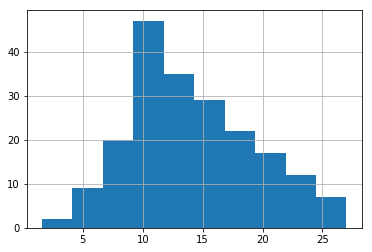

In [4]:
addata['sales'].hist()

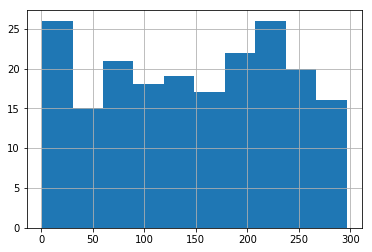

In [5]:
addata['TV'].hist()

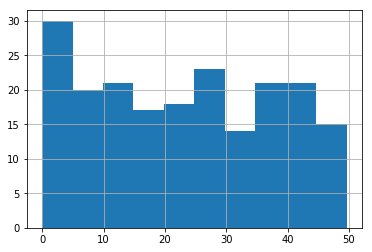

In [6]:
addata['radio'].hist()

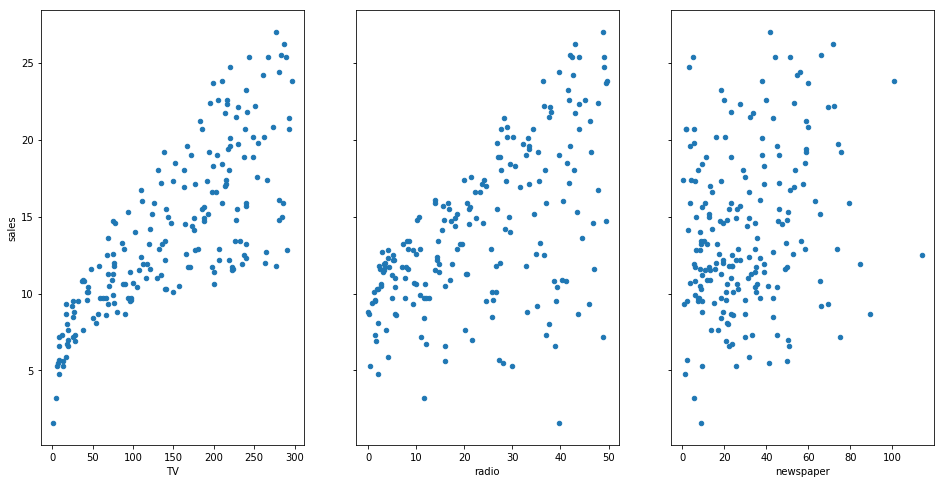

In [10]:
# Visualize the relationship between the features and the response using scatterplots
# Using malpotlib scatter plot
# Using matplotlib subplot to create three plots

fig, axs = plt.subplots(1, 3, sharey=True)
addata.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
addata.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
addata.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

### Questions About the Advertising Data

Let's pretend you have been hired as an anlyatics consultancy you work for the company that manufactures and markets this product.
<br><br>
The company might ask you the following: 
    <br><br>
    __"On the basis of this data, how should we spend our advertising money in the future?"__ <br>

This general question might lead you to more specific questions:

1) Is there a relationship between ads and sales? <br>
2) How strong is that relationship?<br>
3) Which ad types contribute to sales?<br>
4) What is the effect of each ad type of sales?<br>
5) Given ad spending in a particular market, can sales be predicted?<br>

#### We will explore these questions below!

y = ax + b + ERROR

y = b +  a1 * TV + a2 * radio + a3 * news + ERROR

### Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

####  __y = ax + b + ERROR__

What does each term represent?<br>
__y__ is the response
__x__ is the feature/predictor variable
__b__ is the intercept
__a__ is the coefficient for x
__ERROR__ is the error term, the unexplained variance left after having fitted the model

Together,  and  are called the model coefficients. To create your model, you must "learn" the values of these coefficients. 
And once we've learned these coefficients, we can use the model to predict sales!

Estimating ("Learning") Model Coefficients
Generally speaking, coefficients are estimated using the least squares criterion, which means we are find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

<img src="08_estimating_coefficients.png">


What elements are present in the diagram? <br>
The black dots are the observed values of x and y.
The blue line is our least squares line.
The red lines are the residuals, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line? <br>
1) b is the intercept (the value of  when =0) <br>
2) a is the slope (the change in  divided by change in ) <br>

Here is a graphical depiction of those calculations:

<img src="08_slope_intercept.png">


Let's use Statsmodels to estimate the model coefficients for the advertising data:

In [ ]:
# statsmodels is the standard import if you're using "formula notation" (similar to R, which I and other stats people like!)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sales ~ TV', data=addata).fit()
lm2 = smf.ols(formula='sales ~ radio', data=addata).fit()
lm3 = smf.ols(formula='sales ~ newspaper', data=addata).fit()

In [9]:
# print the coefficients
# y = b +  a1 * TV  + ERROR
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           4.35e-19
Time:                        14:50:34   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting Model Coefficients

How do we interpret the TV coefficient ()?

A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.

Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 items.

Note that if an increase in TV ad spending was associated with a decrease in sales,  would be negative.

__Using the Model for Prediction__

Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

In [10]:
lm_full = smf.ols(formula='sales ~ TV + radio + newspaper', data=addata).fit()


In [11]:
lm_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.58e-96
Time:                        14:52:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of __9,409__ items in that market.

Of course, we can also use Statsmodels to make the prediction:

### The important bit: Plotting the Least Squares Line
#### (or plotting our model)

Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [12]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [13]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    9.409426
dtype: float64

In [14]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [addata.TV.min(), addata.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


NameError: name 'preds' is not defined

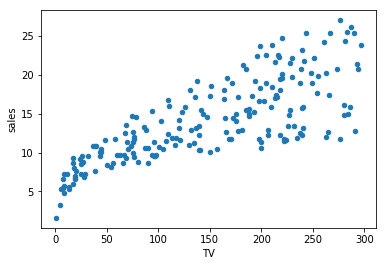

In [15]:

# first, plot the observed data
addata.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [18]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [16]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0    9.409426
dtype: float64

In [19]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [20]:
# print the R-squared value for the model

lm.rsquared

0.611875050850071

### Linear Regression in scikit-learn

#### That was a lot of work!

Let's redo some of the Statsmodels code above in scikit-learn:

In [16]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = addata[feature_cols]
y = addata.sales

In [17]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression

In [18]:
# Classes and instances
lm = LinearRegression()

In [19]:
lm.fit(X, y)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [21]:
# pair the feature names with the coefficients
for name, coef in zip(feature_cols, lm.coef_):
    print(name, coef)


TV 0.045764645455397615
radio 0.1885300169182046
newspaper -0.001037493042476266


In [22]:
# calculate the R-squared
lm.score(X, y)

0.8972106381789521